In [22]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/shopee-sentiment-analysis/train.csv
/kaggle/input/shopee-sentiment-analysis/sampleSubmission.csv
/kaggle/input/shopee-sentiment-analysis/test.csv


# 1. Load data

In [ ]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

path = '/kaggle/input/shopee-sentiment-analysis/'
train_df = pd.read_csv('/kaggle/input/shopee-sentiment-analysis/train.csv')
test_df = pd.read_csv('/kaggle/input/shopee-sentiment-analysis/test.csv')
sampleSubmission_df = pd.read_csv('/kaggle/input/shopee-sentiment-analysis/sampleSubmission.csv')

In [ ]:
train_df.info()

In [ ]:
test_df.info()

In [ ]:
sampleSubmission_df.head()

In [ ]:
type(sampleSubmission_df.rating[0])

In [ ]:
from fastai.text import *
bs=8
data_clas = (TextList.from_csv(path, csv_name='train.csv', cols='review')
        .split_by_rand_pct()
        .label_from_df(cols='rating')
        .add_test(TextList.from_csv(path, csv_name='test.csv', cols='review'))
        .databunch(bs=bs))

# 2. Classifier

In [ ]:
learn = text_classifier_learner(data_clas, Transformer, drop_mult=0.3, model_dir='/kaggle/output')

In [46]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


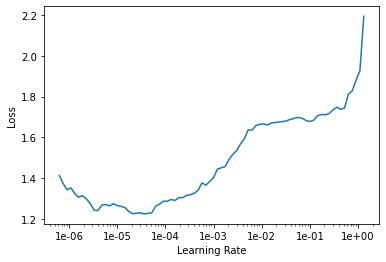

In [47]:
learn.recorder.plot()

# 3. Train model

In [53]:
learn.unfreeze()

In [54]:
learn.fit_one_cycle(1, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time


KeyboardInterrupt: 

In [ ]:
learn.save('first')

In [ ]:
learn.load('first')

In [45]:
learn.freeze_to(-2)

In [48]:
learn.fit_one_cycle(1, slice(1e-5/(2.6**4), 1e-4), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,1.170853,1.133911,0.464308,12:00


In [49]:
learn.save('second')

In [50]:
learn.load('second')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (117449 items)
x: TextList
xxbos xxmaj ga disappointed neat products .. xxmaj xxunk xxmaj xxunk xxmaj speed ​​of delivery is good .,xxbos xxmaj xxunk replace broken glass , broken chargernya,xxbos xxmaj nyesel bngt dsni shopping antecedent photo message pictures gk according xxunk existing collagen super fit nyampe xxunk my house open ehhh collagen contents even in the face pdahal jg description super existing collagen xxunk writing my check lg in photo captions already ma xxmaj the change ma pictures that the face .,xxbos xxmaj hours not a hologram,xxbos xxmaj well , according to xxmaj price
y: CategoryList
1,1,1,1,1
Path: /kaggle/input/shopee-sentiment-analysis;

Valid: LabelList (29362 items)
x: TextList
xxbos xxmaj goods made up a nice red color .. sorry .. but indeterminate as expectations turned out to be snugly fitted jd her look thick hp .. xxmaj tp passable deh make ganti2 case .. xxmaj thanks yaa ..,xxbos xxmaj kirain given

In [ ]:
learn.freeze_to(-3)

In [ ]:
learn.fit_one_cycle(2, slice(1e-6/(2.6**4),1e-5), moms=(0.8,0.7))

# 4. Prediction

In [39]:
# Single item predictions
r1 = learn.predict(test_df.review[0])

In [51]:
# Test set predictions
preds, _ = learn.get_preds(ds_type=DatasetType.Test, ordered=True)
ratings = np.argmax(preds, 1)
print(min(ratings))

tensor(0)


# 5. Submission

In [52]:
submission_preds = ratings + 1
submission_df = pd.DataFrame({'review_id': test_df['review_id'], 'rating': submission_preds})
submission_df.to_csv('submission.csv', header=True, index=False)